In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import densenet
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]


train_path = r'/content/drive/MyDrive/Data Set/Bangla Sign Language/RESIZED_DATASET'
valid_path = r'/content/drive/MyDrive/Datasets/ASL (K)/asl_alphabet_test/asl_alphabet_test'

In [ ]:
dense = tf.keras.applications.densenet.DenseNet121()

In [ ]:
for layer in dense.layers:
    layer.trainable = False

In [ ]:
folders = glob(r'/content/drive/MyDrive/Data Set/Bangla Sign Language/RESIZED_DATASET/*')

In [ ]:
x = Flatten()(dense.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=dense.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [ ]:
from tensorflow import keras 

initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.16,
    staircase=True)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Data Set/Bangla Sign Language/RESIZED_DATASET',
                                                 target_size = (224, 224),
                                                 batch_size = 80,
                                                 class_mode = 'categorical')

Found 11061 images belonging to 38 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Data Set/Bangla Sign Language/RESIZED_TESTING_DATA',
                                            target_size = (224, 224),
                                            batch_size = 80,
                                            class_mode = 'categorical')

Found 1520 images belonging to 38 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
139/139 [==============================] - 3835s 27s/step - loss: 3.6274 - accuracy: 0.0688 - val_loss: 3.6184 - val_accuracy: 0.0980
Epoch 2/20
139/139 [==============================] - 2028s 15s/step - loss: 3.6064 - accuracy: 0.1560 - val_loss: 3.5994 - val_accuracy: 0.1487
Epoch 3/20
139/139 [==============================] - 2059s 15s/step - loss: 3.5860 - accuracy: 0.1896 - val_loss: 3.5813 - val_accuracy: 0.1882
Epoch 4/20
139/139 [==============================] - 2068s 15s/step - loss: 3.5665 - accuracy: 0.2279 - val_loss: 3.5637 - val_accuracy: 0.2086
Epoch 5/20
139/139 [==============================] - 2055s 15s/step - loss: 3.5470 - accuracy: 0.2534 - val_loss: 3.5465 - val_accuracy: 0.2059
Epoch 6/20
139/139 [==============================] - 2042s 15s/step - loss: 3.5284 - accuracy: 0.2495 - val_loss: 3.5298 - val_accuracy: 0.2151
Epoch 7/20
139/139 [==============================] - 2001s 14s/step - loss: 3.5101 - accuracy: 0.2587 - val_loss: 3.5136 - val_ac

In [ ]:
import matplotlib.pyplot as plt

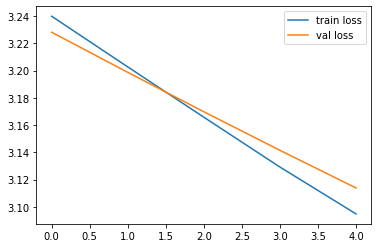

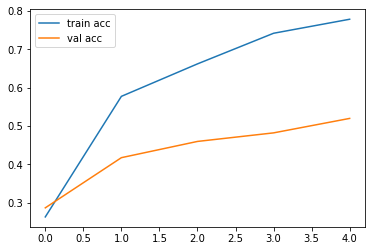

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_DenseNet.h5')